In [166]:
import pandas as pd
import chardet
from sklearn import linear_model

In [167]:
with open("./data_engg.csv", 'rb') as f:
    result = chardet.detect(f.read())

In [168]:
df = pd.read_csv("./data_engg.csv", encoding=result['encoding'])

In [169]:
#df.columns

In [170]:
drop_list = ['BEGDATE', 'PEAKHR', 'SITE',
       'TYPE', 'PEAKVOL', 'Price', 'Row Count', 'TOTVOL', 'late night',
       'early morning', 'morning', 'afternoon', 'evening', 'night',
       'late_night_median', 'early_morning_median', 'morning_median',
       'afternoon_median', 'evening_median', 'night_median']

In [171]:
df = df[drop_list]

In [172]:
ef = df['SITE'].apply(str)

In [173]:
df_Site = pd.get_dummies(ef)

In [174]:
df = pd.concat([df, df_Site], axis=1)

In [175]:
df = df[df['38'] == 0]

In [176]:
df = df[df['130'] == 0]

In [177]:
#df.head()

In [178]:
df.columns

Index(['BEGDATE', 'PEAKHR', 'SITE', 'TYPE', 'PEAKVOL', 'Price', 'Row Count',
       'TOTVOL', 'late night', 'early morning', 'morning', 'afternoon',
       'evening', 'night', 'late_night_median', 'early_morning_median',
       'morning_median', 'afternoon_median', 'evening_median', 'night_median',
       '102', '104', '130', '154', '175', '197', '299', '336', '343', '38'],
      dtype='object')

In [179]:
X = df[['late_night_median', 'early_morning_median', 'morning_median',
       'afternoon_median', 'evening_median', 'night_median','102', '104', '130', '154', '175', '197', '299', '336', '343', '38']]

In [180]:
Y = df[[ 'Price']]

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=.33)

In [182]:


# Lasso
#clf = linear_model.Lasso()
# multivariate
#clf.fit(X_train, Y_train)
#clf.predict (X_test)

In [183]:
# ordinary least squares
clf = linear_model.LinearRegression()
# multivariate
clf.fit(X_train, Y_train)
predictions = clf.predict (X_test)



In [184]:
#pd.DataFrame(predictions)

In [185]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(Y_test, predictions))

RMSE is: 
 6.18773029913e-30


In [186]:
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
#plt.plot([i for i in range(0,100)], Y_test[:100],color='r')
#plt.plot([i for i in range(0,100)], predictions[:100],color='b')

In [188]:

# Ridge
#clf = linear_model.BayesianRidge()
# multivariate
#clf.fit(X_train, Y_train)
#clf.predict (X_test)


In [190]:
X_new = df[['late night', 'early morning', 'morning', 'afternoon',
       'evening', 'night','102', '104', '130', '154', '175', '197', '299', '336', '343', '38']]

In [191]:
x_test = X_new[:100]

In [192]:
x_test = x_test[x_test['102'] == 1]

In [193]:
pred = clf.predict(x_test)

In [194]:
Old_test = pd.DataFrame(pred)

In [195]:
New_Test = df[:100]

In [196]:
New_Test = New_Test['Price'][df['102'] == 1]

In [197]:
df_plot = df[:100]

In [198]:
df_plot = df_plot[df_plot['102'] == 1]

In [199]:
#df_plot

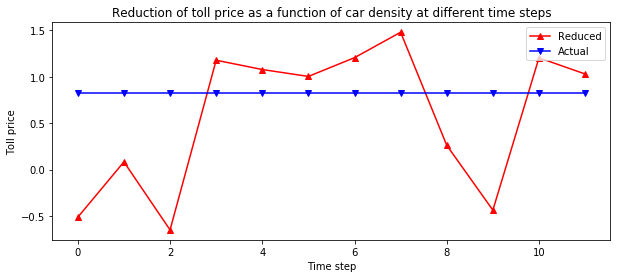

In [200]:

plt.figure(figsize=(10,4))
plt.plot([i for i in range(len(Old_test))],Old_test, color='r', marker='^',label='Reduced')
plt.plot([i for i in range(len(New_Test))],New_Test, color='b',marker='v',label='Actual')
plt.legend(loc=1)
plt.xlabel('Time step')
plt.ylabel('Toll price')
plt.title('Reduction of toll price as a function of car density at different time steps')




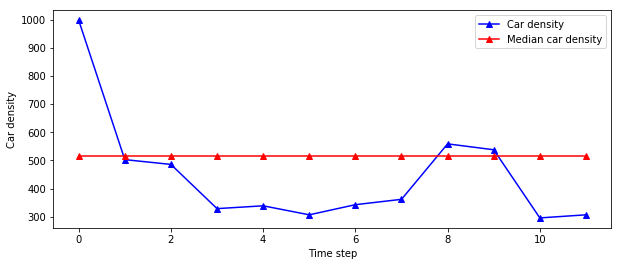

In [201]:
plt.figure(figsize=(10,4))
plt.plot([i for i in range(len(df_plot))],df_plot['late night'], color='b', marker='^',label='Car density')
plt.plot([i for i in range(len(df_plot))],df_plot['late_night_median'], color='r', marker='^',label='Median car density')
plt.xlabel('Time step')
plt.ylabel('Car density')
plt.legend(loc=1)